<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Booking_ID     505 non-null    int64  
 1   Destination    478 non-null    object 
 2   Package_Price  485 non-null    float64
 3   Customer_Age   490 non-null    float64
 4   Rating         480 non-null    float64
 5   Review_Text    485 non-null    object 
 6   Travel_Date    495 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB
None
Booking_ID        0
Destination      27
Package_Price    20
Customer_Age     15
Rating           25
Review_Text      20
Travel_Date      10
dtype: int64


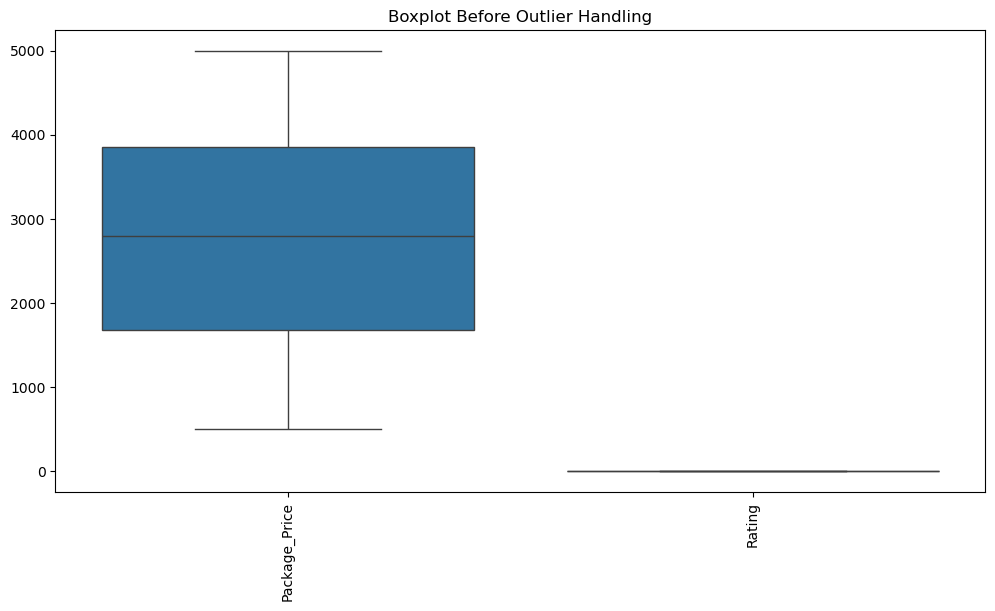

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Load dataset (replace 'travel_reviews.csv' with actual filename)
df = pd.read_csv('Day_18_Tours_and_Travels.csv')

# Handling Missing Data
print(df.info())
print(df.isna().sum())

# Impute missing values for numerical columns with median
for col in ['Package_Price', 'Customer_Age', 'Rating']:
    df[col].fillna(df[col].median(), inplace=True)

# Handle missing textual data in Review_Text
df['Review_Text'].fillna("No Review", inplace=True)

# Detect and Remove Duplicates
df.drop_duplicates(inplace=True)

# Handle Inconsistent Data
# Ensure Rating values are between 1-5
df['Rating'] = np.clip(df['Rating'], 1, 5)

# Identify and Handle Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Package_Price', 'Rating']])
plt.title("Boxplot Before Outlier Handling")
plt.xticks(rotation=90)
plt.show()

# Apply capping for outliers
for col in ['Package_Price', 'Rating']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Convert categorical data into numerical format where required
encoder = LabelEncoder()
for col in ['Destination', 'Review_Text', 'Travel_Date']:
    df[col] = encoder.fit_transform(df[col])

# Save cleaned dataset
df.to_csv('Day_18_Cleaned_Tours_and_Travels.csv', index=False)


In [2]:
df = pd.read_csv('Day_18_Tours_and_Travels.csv')
df

,Booking_ID,Destination,Package_Price,Customer_Age,Rating,Review_Text,Travel_Date
0,1,London,1094.0,21.0,NaN,Amazing experience!,2023-01-01
1,2,Paris,640.0,20.0,NaN,Loved the trip!,2023-01-02
2,3,Singapore,3393.0,42.0,3.0,Could be better,2023-01-03
3,4,London,3555.0,40.0,4.0,Amazing experience!,2023-01-04
4,5,Dubai,2130.0,44.0,2.0,Highly recommended,2023-01-05
...,...,...,...,...,...,...,...
500,441,New York,1600.0,64.0,3.0,Highly recommended,2024-03-16
501,487,Dubai,2875.0,66.0,4.0,Loved the trip!,2024-05-01
502,432,London,2532.0,21.0,3.0,Amazing experience!,2024-03-07
503,383,Dubai,1375.0,34.0,4.0,Highly recommended,2024-01-18
